In [5]:
import matplotlib.pyplot as plt
import  numpy as np
import pandas as pd


from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

In [6]:
digits = load_digits()

In [8]:
kmeans_kwargs = {'init':'random',
                 'n_init':50,
                 'max_iter':500,
                 'random_state':0
}



In [19]:
pipeline = Pipeline([('preprocessing',MinMaxScaler()),('Clustering',KMeans(n_clusters = 10,**kmeans_kwargs))])

In [25]:
pipeline.fit(digits.data)

Pipeline(steps=[('preprocessing', MinMaxScaler()),
                ('Clustering',
                 KMeans(init='random', max_iter=500, n_clusters=10, n_init=50,
                        random_state=0))])

In [28]:
cluster_center = pipeline[-1].cluster_centers_
cluster_center

array([[ 0.00000000e+00,  1.17857143e-01,  6.36785714e-01,
         9.02500000e-01,  4.85714286e-01,  6.14285714e-02,
        -8.32667268e-17, -2.08166817e-17,  1.14285714e-02,
         3.27500000e-01,  8.57500000e-01,  7.88928571e-01,
         7.30714286e-01,  2.02142857e-01,  1.07142857e-03,
        -2.08166817e-17,  5.71428571e-03,  2.85000000e-01,
         5.07142857e-01,  3.83571429e-01,  7.60000000e-01,
         2.22500000e-01,  1.07142857e-03,  9.54097912e-18,
        -2.81892565e-18,  6.43809524e-02,  1.76071429e-01,
         4.37857143e-01,  7.83571429e-01,  1.60000000e-01,
         2.66666667e-03, -5.63785130e-18,  0.00000000e+00,
         3.26530612e-03,  9.82142857e-02,  6.18571429e-01,
         6.68571429e-01,  9.07142857e-02,  9.43689571e-16,
         0.00000000e+00, -5.63785130e-18,  1.57142857e-02,
         2.78571429e-01,  7.02857143e-01,  4.83928571e-01,
         1.48214286e-01,  5.28571429e-02,  1.90476190e-03,
        -2.92734587e-18,  7.46428571e-02,  6.87142857e-0

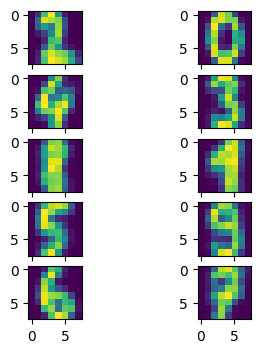

In [31]:
fig,ax = plt.subplots(5,2,figsize = (4,4))
for i,j in zip(ax.flat,cluster_center.reshape(10,8,8)):
  i.imshow(j)

In [35]:
#elow method to find best k

sse_digits = []
scaled_digits = MinMaxScaler().fit_transform(digits.data)
for k in range(1,12):
  kmeans = KMeans(n_clusters = k,**kmeans_kwargs)
  kmeans.fit(scaled_digits)
  sse_digits.append(kmeans.inertia_)


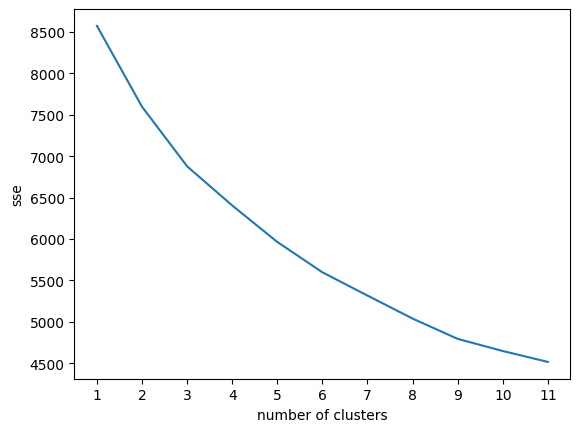

In [38]:
plt.plot(range(1,12),sse_digits)
plt.xticks(range(1,12))
plt.xlabel('number of clusters')
plt.ylabel('sse')
plt.show()

In [41]:
sil_score = []
for i in range(2,15):
  kmeans = KMeans(n_clusters = i,**kmeans_kwargs)
  kmeans.fit(scaled_digits)
  score = silhouette_score(digits.data,kmeans.labels_)
  sil_score.append(score)

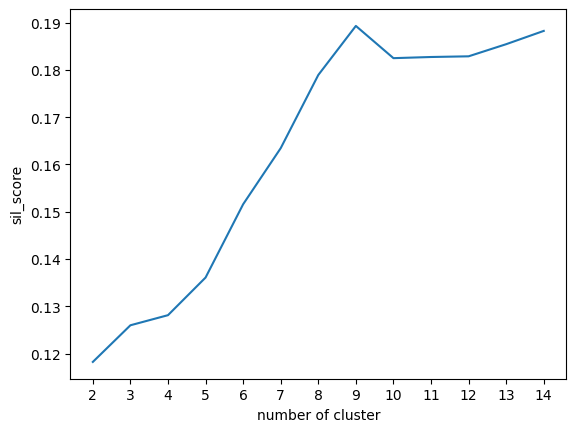

In [45]:
plt.plot(range(2,15),sil_score)
plt.xticks(range(2,15))
plt.xlabel('number of cluster')
plt.ylabel('sil_score')
plt.show()